In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/mohit/Documents/Minor_Project/code/Data_Downloading/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

T    TM    Tm   H   VV    V  PM2.5
0  14.7  21.0  10.0  76  0.6  3.0  143.0
1  14.4  15.0  13.0  91  1.4  6.1  319.0
2  14.0  17.0  11.0  91  0.6  4.8  325.0
3   9.1  12.0   6.0  91  0.5  6.7  375.0
4   8.4  10.0   7.0  95  0.5  5.7  376.0

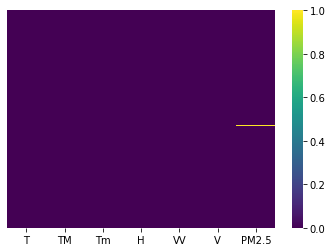

In [4]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [5]:
df=df.dropna()

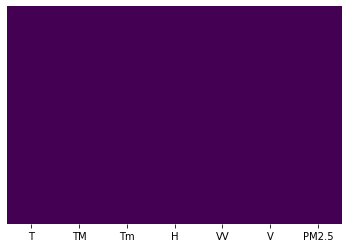

In [6]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [8]:
## check null values
X.isnull()

T     TM     Tm      H     VV      V
0    False  False  False  False  False  False
1    False  False  False  False  False  False
2    False  False  False  False  False  False
3    False  False  False  False  False  False
4    False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...
922  False  False  False  False  False  False
923  False  False  False  False  False  False
924  False  False  False  False  False  False
925  False  False  False  False  False  False
926  False  False  False  False  False  False

[921 rows x 6 columns]

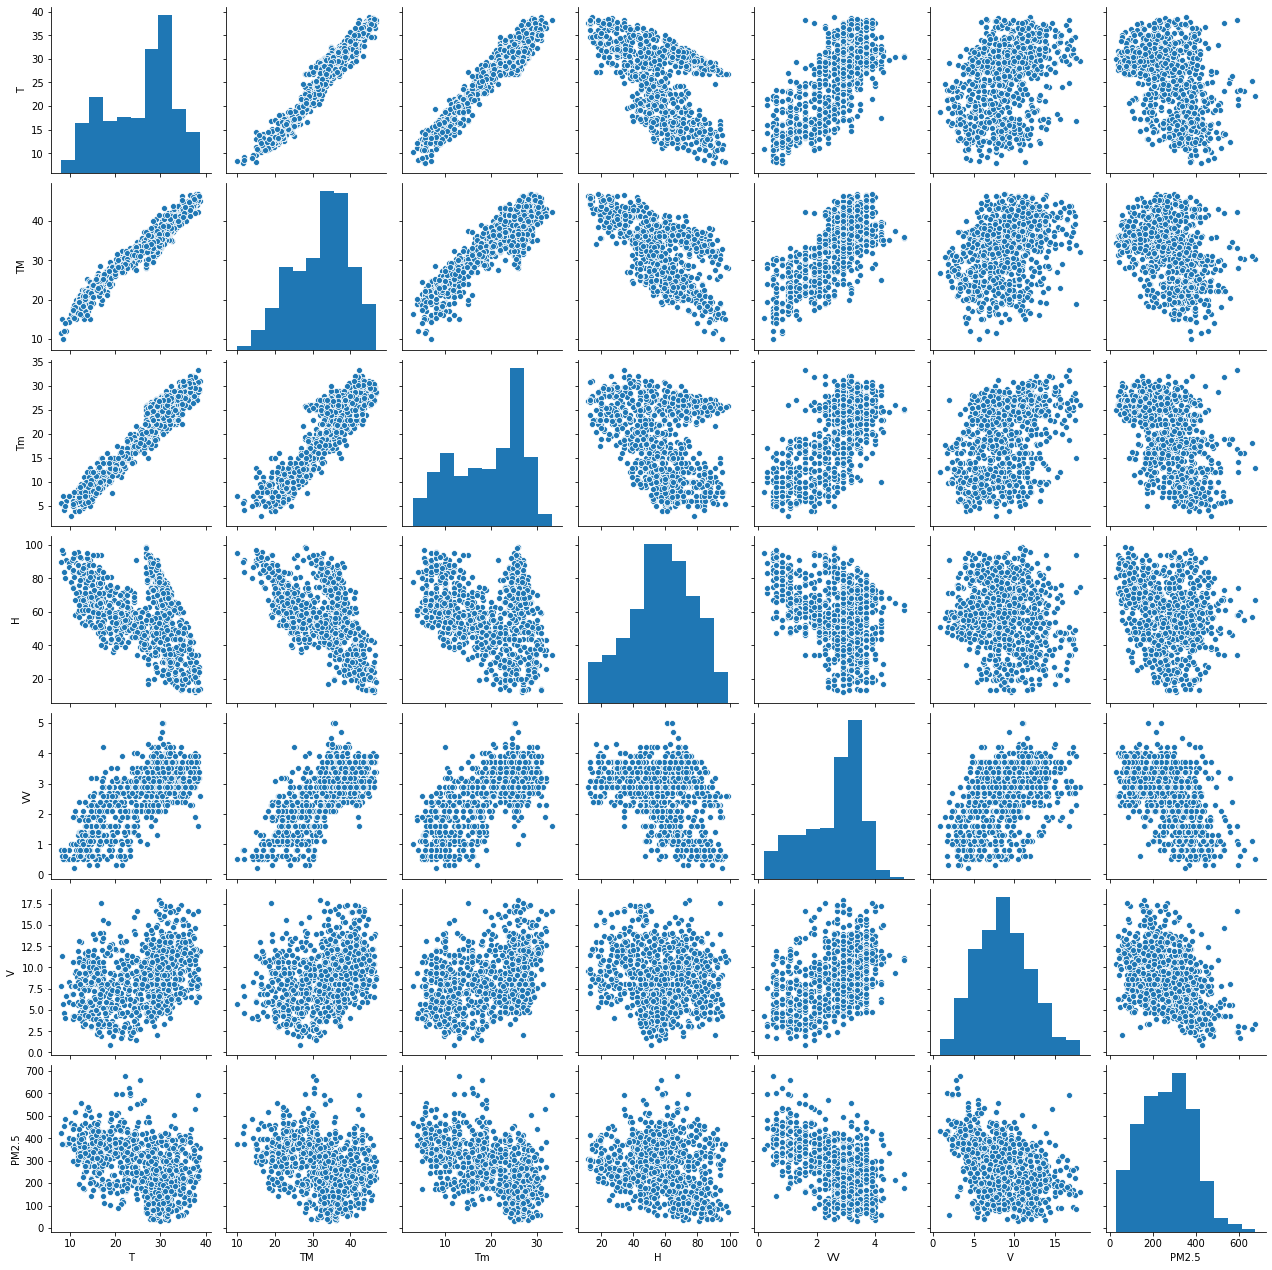

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

T        TM        Tm         H        VV         V     PM2.5
T      1.000000  0.968266  0.959900 -0.466722  0.741891  0.348184 -0.445896
TM     0.968266  1.000000  0.884782 -0.592337  0.724214  0.323084 -0.362261
Tm     0.959900  0.884782  1.000000 -0.242820  0.700875  0.376609 -0.547502
H     -0.466722 -0.592337 -0.242820  1.000000 -0.396366 -0.143841 -0.225427
VV     0.741891  0.724214  0.700875 -0.396366  1.000000  0.427685 -0.540643
V      0.348184  0.323084  0.376609 -0.143841  0.427685  1.000000 -0.403599
PM2.5 -0.445896 -0.362261 -0.547502 -0.225427 -0.540643 -0.403599  1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

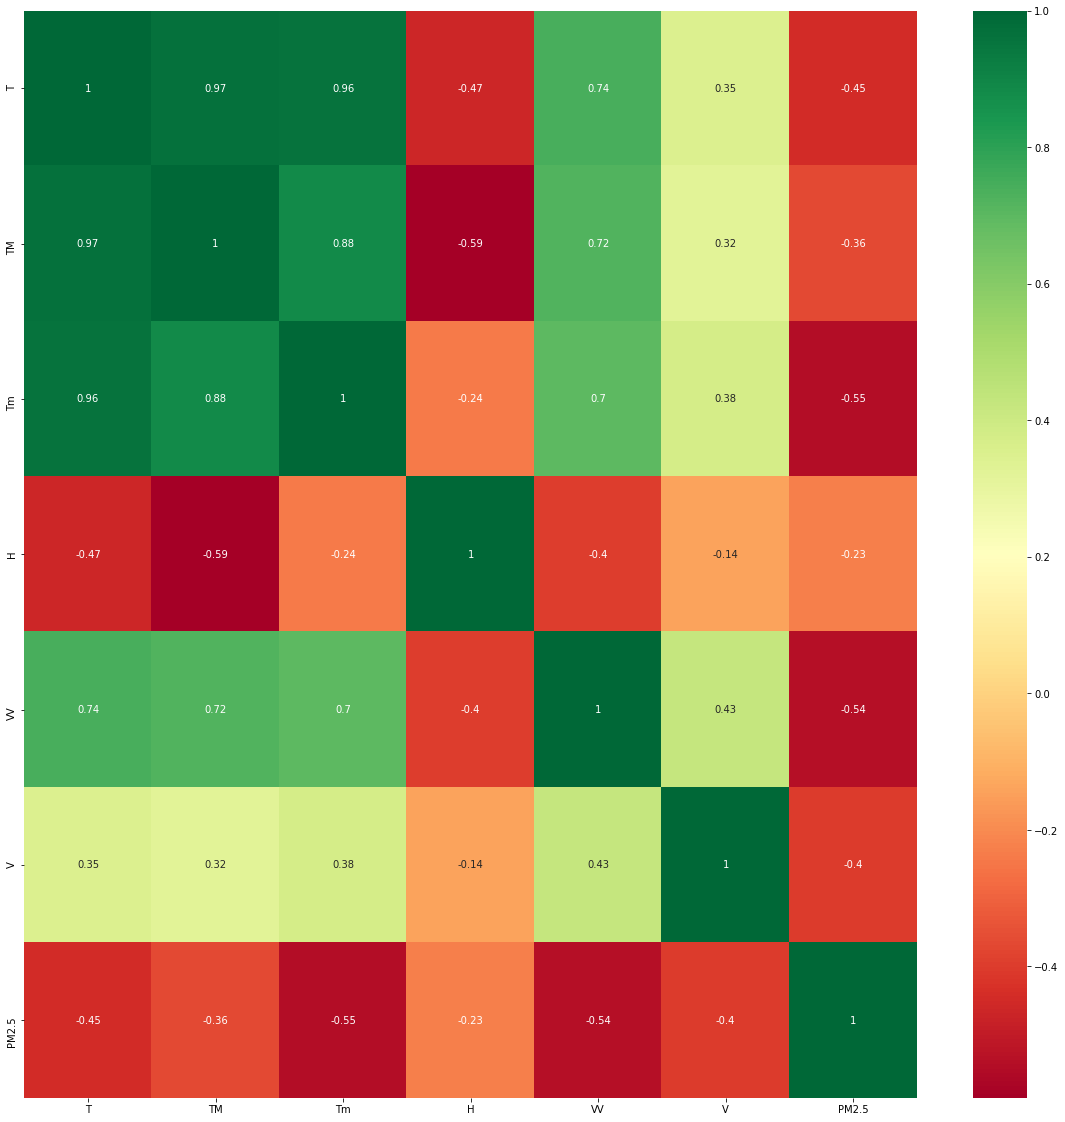

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'PM2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:
X.head()

T    TM    Tm   H   VV    V
0  14.7  21.0  10.0  76  0.6  3.0
1  14.4  15.0  13.0  91  1.4  6.1
2  14.0  17.0  11.0  91  0.6  4.8
3   9.1  12.0   6.0  91  0.5  6.7
4   8.4  10.0   7.0  95  0.5  5.7

In [15]:
print(model.feature_importances_)

[0.11821842 0.08861536 0.23682051 0.22434373 0.19948027 0.13252171]


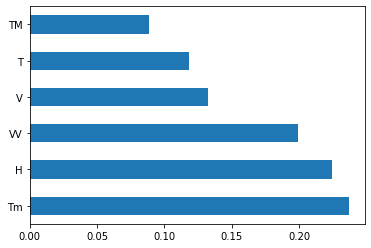

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Decision Tree Regression

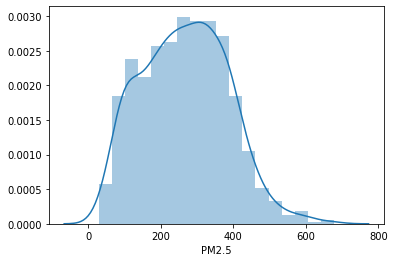

In [19]:
sns.distplot(y)

### Train Test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [25]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3489667094091329


In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [27]:
score.mean()

0.03458365327044438


### Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [30]:

##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [31]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'H', 'VV', 'V']

In [32]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [33]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.829502 to fit



### Model Evaluation

In [34]:
prediction=dtree.predict(X_test)

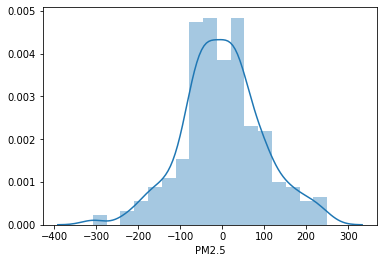

In [35]:
sns.distplot(y_test-prediction)

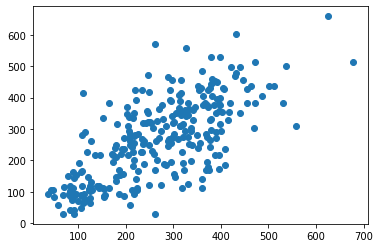

In [36]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning Decision Tree Regressor

In [37]:
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [39]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [40]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [41]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [42]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 4840 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 7656 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 10984 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 14824 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 19176 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 24040 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 29416 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 35304 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 41704 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 48616 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 56040 tas


 Time taken: 0 hours 4 minutes and 4.05 seconds.


In [43]:
random_search.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [44]:
random_search.best_score_

-7605.080862246963

In [45]:
predictions=random_search.predict(X_test)

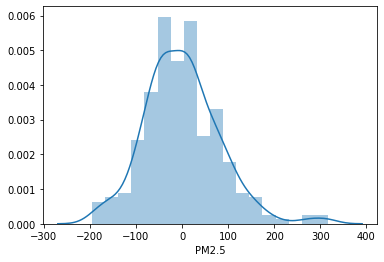

In [46]:
sns.distplot(y_test-predictions)

In [48]:
from sklearn import metrics
print('Decision Tree')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Decision Tree
MAE: 62.94523828803845
MSE: 6761.369439266931
RMSE: 82.22754671803685


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)